Quick notebook to get plots for how long it takes to rank nodes correctly

In [6]:
from collections import defaultdict
import os
import sys 
from tqdm import tqdm
import itertools
import utils.file_utils as utils
sys.path.append("/data/jeff-law/projects/fungcat-function-prediction/src")
#sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath(__file__)))))
import fungcat_settings as f_settings
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
os.chdir("/data/jeff-law/projects/fungcat-function-prediction")

In [3]:
os.getcwd()

'/data/jeff-law/projects/fungcat-function-prediction'

In [4]:
def plot_series(s, title='', xlabel='', ylabel='', out_file=None):
    fig, ax = plt.subplots()
    s.index += 1
    s.plot()
    # also add an inlet 
    s.index -= 1
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if s.min() < 1e-10:
        ax.set_yscale('log')
    plt.tight_layout()
    plt.show()
    if out_file is not None:
        print("writing figure to %s" % (out_file))
        plt.savefig(out_file)
    plt.close()

In [5]:
def get_iteration_at_cutoff(df, cutoff, col_to_get='kendalltau', cutoff_col='max_d', less_than=True):
    """
    *less_than*: If True, find the first occurance <= cutoff. Otherwise find >= cutoff
    """
    val_at_cutoff = {}
    for goterm in df['#goterm'].unique():
        goterm_df = df[df['#goterm'] == goterm]
        for v1, v2 in goterm_df[[col_to_get, cutoff_col]].values:
            if (less_than is True and v2 <= cutoff) \
                or (less_than is False and v2 >= cutoff):
                val_at_cutoff[goterm] = v1
                break
    return val_at_cutoff

In [7]:
# setup settings
# version = "2018_06-seq-sim-e0_1"
# version = "2018_06-seq-sim-e0_1-string"
version = "2018_06-seq-sim-e0_1-string-700"
# version = "2018_09-s200-seq-sim-e0_1"
exp_name = "expc"
eval_ev_codes = ""
# exp_name = "expc-comp-rem-neg-iea"
# eval_ev_codes = "comp"
# eval_ev_codes = "iea"
cutoff = "50-1000"
# cutoff = "50-rand-50"
stats_dir = "outputs/viz/ranks/"
h = 'bp'
# h = 'mf'
stats_dir = "outputs/%s/all/sinksource-squeeze/%s-%s%s%s-%s-use-neg" % (
    version, exp_name, cutoff, eval_ev_codes, "-core" if 'string' in version else '', h)
out_dir = "outputs/viz/ranks/loso-%s%s/%s" % (exp_name, eval_ev_codes, version)
utils.checkDir(out_dir)

alg = "sinksource-squeeze"
# alg = "sinksourceplus-squeeze"
# k_str = '200'
k_str = 'all'
# alpha = "a0_8"
alpha = "a0_95"
# alpha = "a1_0"
# exp_type = "all-"
exp_type = "pos-neg-"
# all_ranks_file = "%s/compare-ranks-%s-%s-k%s.txt" % (out_dir, version, alg, k_str)
# all_ranks_file = "%s/pred-compare-ranks-a0_8-k%s.txt" % (stats_dir, k_str)
all_ranks_file = "%s/pred-compare-%sranks-%s-k%s.txt" % (stats_dir, exp_type, alpha, k_str)

Dir outputs/viz/ranks/loso-expc/2018_06-seq-sim-e0_1-string-700 doesn't exist. Creating it


In [17]:
# read files
print("Reading rankings from %s" % (all_ranks_file))
df = pd.read_csv(all_ranks_file, sep='\t')
df = df[df['num_pos'] >= 10]

out_pref = "%s/%s%s-%s" % (out_dir, exp_type, h, alpha)
print("out_pref: %s" % (out_pref))
print("%d GO terms" % (df['#goterm'].nunique()))
df.head()

Reading rankings from outputs/2018_06-seq-sim-e0_1-string-700/all/sinksource-squeeze/expc-50-1000-core-bp-use-neg/pred-compare-pos-neg-ranks-a0_95-kall.txt
out_pref: outputs/viz/ranks/loso-expc/2018_06-seq-sim-e0_1-string-700/pos-neg-bp-a0_95
285 GO terms


,#goterm,taxon,num_pos,iter,kendalltau,num_unranked,max_unr_stretch,max_d,UB,fmax,avgp,auprc,auroc
0,GO:0022607,208964,208,1,0.153845,774,0,0.950000,18.050,0.1724,0.0656,0.0840,0.7361
1,GO:0022607,208964,208,2,0.530097,774,0,0.479300,17.147,0.0813,0.0335,0.0521,0.5203
2,GO:0022607,208964,208,3,0.687776,774,0,0.213520,16.290,0.0789,0.0324,0.0510,0.5000
3,GO:0022607,208964,208,4,0.748482,774,0,0.202840,15.476,0.0787,0.0329,0.0514,0.5146
4,GO:0022607,208964,208,5,0.785192,774,0,0.095265,14.702,0.0776,0.0328,0.0514,0.5157


In [20]:
df['goterm-taxon'] = df['#goterm'] + '-' + df['taxon'].map(str)
# df['goterm-taxon'] = df[['#goterm', 'taxon']].apply(lambda x: '-'.join(x))
df.head()

,#goterm,taxon,num_pos,iter,kendalltau,num_unranked,max_unr_stretch,max_d,UB,fmax,avgp,auprc,auroc,goterm-taxon
0,GO:0022607,208964,208,1,0.153845,774,0,0.950000,18.050,0.1724,0.0656,0.0840,0.7361,GO:0022607-208964
1,GO:0022607,208964,208,2,0.530097,774,0,0.479300,17.147,0.0813,0.0335,0.0521,0.5203,GO:0022607-208964
2,GO:0022607,208964,208,3,0.687776,774,0,0.213520,16.290,0.0789,0.0324,0.0510,0.5000,GO:0022607-208964
3,GO:0022607,208964,208,4,0.748482,774,0,0.202840,15.476,0.0787,0.0329,0.0514,0.5146,GO:0022607-208964
4,GO:0022607,208964,208,5,0.785192,774,0,0.095265,14.702,0.0776,0.0328,0.0514,0.5157,GO:0022607-208964


In [13]:
df = df.set_index(['#goterm', 'taxon', 'iter'])
df.head()

num_pos  kendalltau  num_unranked  max_unr_stretch  \
#goterm    taxon  iter                                                       
GO:0022607 208964 1         208    0.153845           774                0   
                  2         208    0.530097           774                0   
                  3         208    0.687776           774                0   
                  4         208    0.748482           774                0   
                  5         208    0.785192           774                0   

                           max_d      UB    fmax    avgp   auprc   auroc  
#goterm    taxon  iter                                                    
GO:0022607 208964 1     0.950000  18.050  0.1724  0.0656  0.0840  0.7361  
                  2     0.479300  17.147  0.0813  0.0335  0.0521  0.5203  
                  3     0.213520  16.290  0.0789  0.0324  0.0510  0.5000  
                  4     0.202840  15.476  0.0787  0.0329  0.0514  0.5146  
                  5     0.095265  14.702  0.0776  0.0328  0.0514  0.5157

In [53]:
# make sure the comparison is split into bp and mf 
lines = utils.readColumns("inputs/only-functions/expc/expc-50-1000.txt", 1, 3)
bp = set()
mf = set()
for goid, gocat in lines:
    if gocat == 'P':
        bp.add(goid)
    elif gocat == 'F':
        mf.add(goid)
print(len(bp), len(mf))
if h == "bp":
    df = df[df['#goterm'].isin(bp)]
else:
    df = df[df['#goterm'].isin(mf)]
print(df['#goterm'].nunique())

(319, 117)
25


In [80]:
# for each goterm, get the iteration at which kendalltau hits 95%, 99% and 100%
iter_90 = get_iteration_at_cutoff(df, 0.90, col_to_get='iter', cutoff_col='kendalltau', less_than=False)
iter_95 = get_iteration_at_cutoff(df, 0.95, col_to_get='iter', cutoff_col='kendalltau', less_than=False)
iter_99 = get_iteration_at_cutoff(df, 0.99, col_to_get='iter', cutoff_col='kendalltau', less_than=False)
iter_100 = get_iteration_at_cutoff(df, 1.0, col_to_get='iter', cutoff_col='kendalltau', less_than=False)
df_cutoffs = pd.DataFrame({'0.90': iter_90, '0.95': iter_95, '0.99': iter_99, '1.0': iter_100})
df_cutoffs = df_cutoffs[['0.90', '0.95', '0.99', '1.0']]
df_cutoffs.head()

,0.90,0.95,0.99,1.0
GO:0006112,25.0,47.0,92.0,200.0
GO:0006563,24.0,43.0,84.0,155.0
GO:0006566,22.0,40.0,80.0,127.0
GO:0006928,19.0,36.0,74.0,249.0
GO:0009060,19.0,36.0,69.0,90.0


In [81]:
#     - Also plot the total # of iterations it takes to fix all node ranks
total_iters = df.groupby('#goterm')['iter'].max()
total_iters.head()
df_cutoffs['Fixed ordering'] = total_iters

In [46]:
# for each goterm, get the iteration at which kendalltau hits 95%, 99% and 100%
iter_80 = get_iteration_at_cutoff(df, 0.80, col_to_get='iter', cutoff_col='kendalltau', less_than=False)
df_cutoffs['0.80'] = pd.Series(iter_80)
df_cutoffs.head()

,0.90,0.95,0.99,1.0,Fixed ordering,0.80
GO:0000160,28.0,46.0,84.0,212.0,212,12.0
GO:0000271,23.0,34.0,56.0,176.0,349,12.0
GO:0001539,18.0,28.0,52.0,145.0,390,9.0
GO:0002790,19.0,30.0,55.0,155.0,376,10.0
GO:0005975,19.0,30.0,53.0,137.0,380,9.0


In [82]:
for col in df_cutoffs.columns:
    print("%s median: %d" % (col, df_cutoffs[col].median()))
df_cutoffs.head()

0.90 median: 21
0.95 median: 39
0.99 median: 80
1.0 median: 262
Fixed ordering median: 583


,0.90,0.95,0.99,1.0,Fixed ordering
GO:0006112,25.0,47.0,92.0,200.0,344
GO:0006563,24.0,43.0,84.0,155.0,155
GO:0006566,22.0,40.0,80.0,127.0,551
GO:0006928,19.0,36.0,74.0,249.0,727
GO:0009060,19.0,36.0,69.0,90.0,94


Writing figure to outputs/viz/ranks/loso-expc-comp-rem-neg-ieaiea/2018_09-s200-seq-sim-e0_1/pos-neg-bp-a0_95-ktau-cutoffs-boxplots.pdf


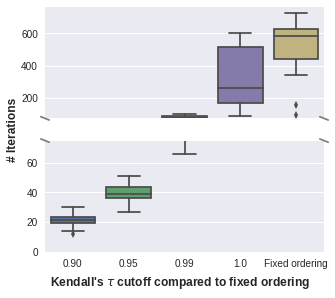

In [83]:
# fig, (ax1, ax2) = plt.subplots(ncols=2)

# insert a break into the plot to better show the small and large ranges
f, (ax2, ax1) = plt.subplots(ncols=1, nrows=2, sharex=True, figsize=(5,4.5))
sns.boxplot(df_cutoffs, ax=ax1)#, order=["0.80", '0.90', '0.95', '0.99', '1.0', 'Fixed ordering'])
sns.boxplot(df_cutoffs, ax=ax2)#, order=["0.80", '0.90', '0.95', '0.99', '1.0', 'Fixed ordering'])
# f, ax1 = plt.subplots()
# sns.boxplot(df_cutoffs, ax=ax1)

ymin, ymax = ax1.get_ylim()
# ax1.set_ylim(-2, df_cutoffs['1.0'].max())
# ax1.set_ylim(0, df_cutoffs['0.99'].max())
ax1.set_ylim(0, 75)
ymin, ymax = ax2.get_ylim()
# ax2.set_ylim(df_cutoffs['Correct ranking'].min(), ymax)
# ax2.set_ylim(df_cutoffs['1.0'].min()-10, ymax)
ax2.set_ylim(75, ymax)
# ax2.set_ylim(75, ymax)

# now get the fancy diagonal lines
d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax2.transAxes, color='tab:gray', clip_on=False)
# ax2.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax2.plot((+d, -d), (-d, +d), **kwargs)        # top-left diagonal
ax2.plot((1 + d, 1 - d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax1.transAxes)  # switch to the bottom axes
ax1.plot((+d, -d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax1.plot((1 + d, 1 - d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

xlabel = r"Kendall's $\tau$ cutoff compared to fixed ordering"
ylabel = "# Iterations"
# ax1.set_xlabel(xlabel)
# ax1.set_ylabel(ylabel)
# ax1.set_title("# iterations to \n rank nodes correctly")
# plt.suptitle("%d goterms, %s, %s k\n%s" % (df['#goterm'].nunique(), alg, k_str, exp_name))
f.text(0.02, 0.5, ylabel, va='center', rotation='vertical', fontsize=12, fontweight='bold')
f.text(0.5, 0.02, xlabel, ha='center', fontsize=12, fontweight='bold')
# plt.tight_layout()

# out_file = all_ranks_file.replace('.txt', '-%s.png' % (h))
# out_file = "%s/%s-%s-loso-pos-neg-ktau-cutoffs-boxplots.png" % (out_dir, version, h)
out_file = "%s-ktau-cutoffs-boxplots.pdf" % (out_pref)
print("Writing figure to %s" % (out_file))
# plt.savefig(out_file)
plt.show()
plt.close()

In [55]:
# for each goterm, get the iteration at which kendalltau hits 95%, 99% and 100%
iter_95 = get_iteration_at_cutoff(df, 0.01, col_to_get='kendalltau', cutoff_col='max_d')
iter_99 = get_iteration_at_cutoff(df, 0.001, col_to_get='kendalltau', cutoff_col='max_d')
iter_100 = get_iteration_at_cutoff(df, 0.0001, col_to_get='kendalltau', cutoff_col='max_d')
df_cutoffs2 = pd.DataFrame({'0.01': iter_95, '0.001': iter_99, '0.0001': iter_100})
df_cutoffs2 = df_cutoffs2[['0.01', '0.001', '0.0001']]
df_cutoffs2.head()

,0.01,0.001,0.0001
GO:0000160,0.944853,0.982430,0.995380
GO:0000166,0.967454,0.991609,0.997544
GO:0000270,0.938391,0.979875,0.995449
GO:0000271,0.952998,0.986443,0.996805
GO:0000287,0.961333,0.989012,0.997493


In [56]:
# for each goterm, get the iteration at which kendalltau hits 95%, 99% and 100%
iter_95 = get_iteration_at_cutoff(df, 0.01, col_to_get='iter', cutoff_col='max_d')
iter_99 = get_iteration_at_cutoff(df, 0.001, col_to_get='iter', cutoff_col='max_d')
iter_100 = get_iteration_at_cutoff(df, 0.0001, col_to_get='iter', cutoff_col='max_d')
df_cutoffs_iter = pd.DataFrame({'0.01': iter_95, '0.001': iter_99, '0.0001': iter_100})
df_cutoffs_iter = df_cutoffs_iter[['0.01', '0.001', '0.0001']]
df_cutoffs_iter.head()

,0.01,0.001,0.0001
GO:0000160,8.0,15.0,23.0
GO:0000166,9.0,17.0,24.0
GO:0000270,8.0,15.0,24.0
GO:0000271,8.0,15.0,23.0
GO:0000287,8.0,15.0,23.0


Writing figure to outputs/viz/ranks/expc-rem-neg-comp-iea/compare-ranks-2018_06-seq-sim-e0_1-sinksource-squeeze-kall-eps.png


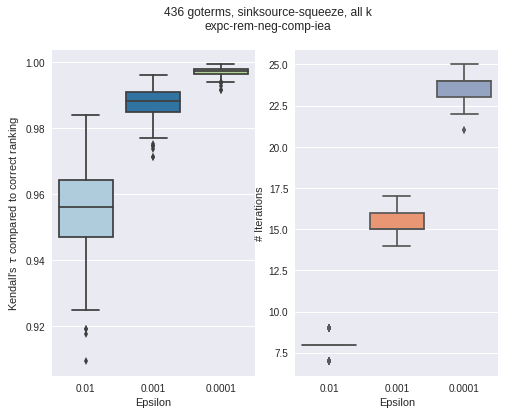

In [57]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,6))
# fig, ax1 = plt.subplots()

sns.boxplot(df_cutoffs2, ax=ax1, palette='Paired')
ax1.set_xlabel("Epsilon")
ax1.set_ylabel(r"Kendall's $\tau$ compared to correct ranking")
# ax1.set_title("# iterations to \n rank nodes correctly")
sns.boxplot(df_cutoffs_iter, ax=ax2, palette="Set2")
ax2.set_xlabel("Epsilon")
ax2.set_ylabel("# Iterations")

plt.suptitle("%d goterms, %s, %s k\n%s" % (df['#goterm'].nunique(), alg, k_str, exp_name))
# plt.tight_layout()

out_file = all_ranks_file.replace('.txt', '-eps.png')
print("Writing figure to %s" % (out_file))
plt.savefig(out_file)
plt.savefig(out_file.replace('.png', '.pdf'))
plt.show()
plt.close()

Writing figure to outputs/viz/ranks/expc-rem-neg-comp-iea/compare-ranks-2018_06-seq-sim-e0_1-sinksource-squeeze-kall-kt-eps.png


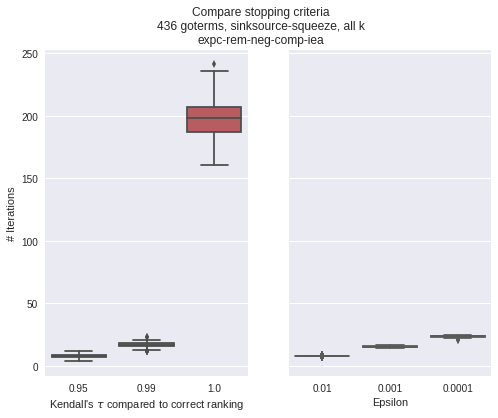

In [18]:
df_cutoffs1 = df_cutoffs[['0.95', '0.99', '1.0']]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,6), sharey=True)
# fig, ax1 = plt.subplots()

sns.boxplot(df_cutoffs1, ax=ax1)
ax1.set_xlabel(r"Kendall's $\tau$ compared to correct ranking")
ax1.set_ylabel("# Iterations")
# ax1.set_title("# iterations to \n rank nodes correctly")
sns.boxplot(df_cutoffs_iter, ax=ax2, palette="Set2")
ax2.set_xlabel("Epsilon")
# ax2.set_ylabel("# Iterations")

plt.suptitle("Compare stopping criteria\n%d goterms, %s, %s k\n%s" % (df['#goterm'].nunique(), alg, k_str, exp_name))
# plt.tight_layout()

out_file = all_ranks_file.replace('.txt', '-kt-eps.png')
print("Writing figure to %s" % (out_file))
plt.savefig(out_file)
plt.savefig(out_file.replace('.png', '.pdf'))
plt.show()
plt.close()

/home/jeffl/.local/lib/python2.7/site-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


writing to outputs/viz/ranks/loso-expc-rem-neg-comp-iea/2018_06-seq-sim-e0_1/pos-neg-mf-a0_95-fmax-iters-lines.pdf


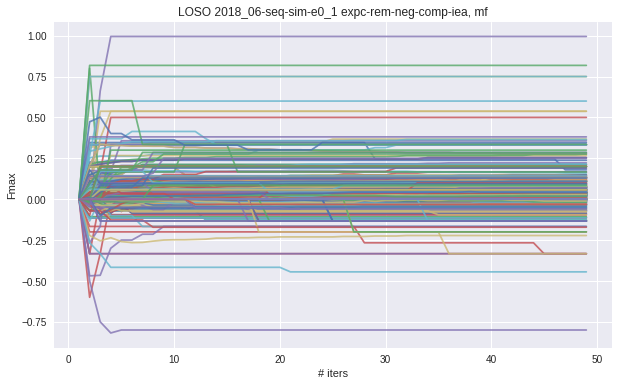

In [183]:
# try plotting the fmax at each iteration for each GO term
fig, ax = plt.subplots(figsize=(10,6))
for goterm, taxon in df[['#goterm', 'taxon']].drop_duplicates().values:
    goterm_df = df[df['iter'] < 50][df['#goterm'] == goterm][df['taxon'] == taxon]
    fmax_diff = goterm_df['fmax'] - goterm_df['fmax'].values[0]
#     print(fmax_diff)
#     print(goterm_df['iter'])
    plt.plot(goterm_df['iter'].values, fmax_diff.values, alpha=0.8)
plt.ylabel('Fmax')
plt.xlabel('# iters')
plt.title("LOSO %s %s, %s" % (version, exp_name, h))
out_file = "%s-fmax-iters-lines.pdf" % (out_pref)
print("writing to %s" % (out_file))
plt.savefig(out_file)
# plt.savefig(out_file.replace('.png', '.pdf'))
plt.show()
plt.close()

/home/jeffl/.local/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


(0, 640, 0.0)
(20, 640, 0.0)
[-0.012400000000000022, 0.0797, 0.0816, 0.1099, 0.08729999999999993, 0.0724999999999999, 0.036800000000000055, 0.0049000000000000155, 0.13010000000000005, 0.06910000000000005, 0.06910000000000005, 0.06799999999999995, 0.0724999999999999, 0.0, 0.11300000000000002, 0.0, 0.06359999999999999, 0.02939999999999998, 0.0, 0.0, -0.16669999999999996, 0.08330000000000004, 0.03259999999999996, -0.0727000000000001, 0.04520000000000002, -0.10709999999999997, 0.0, 0.9951, 0.3483, 0.05719999999999997, 0.23809999999999998, 0.0023999999999999994, -0.052600000000000036, -0.012800000000000034, 0.07350000000000001, 0.02300000000000002, 0.0616000000000001, 0.03359999999999996, -0.020199999999999996, 0.05070000000000008, 0.03810000000000002, 0.050000000000000044, -0.05830000000000002, -0.04349999999999998, 0.1379999999999999, 0.016100000000000003, 0.0, -0.05349999999999999, 0.044300000000000006, 0.022599999999999953, -0.06669999999999998, 0.0, 0.01629999999999998, 0.0230000000000

ValueError: min() arg is an empty sequence

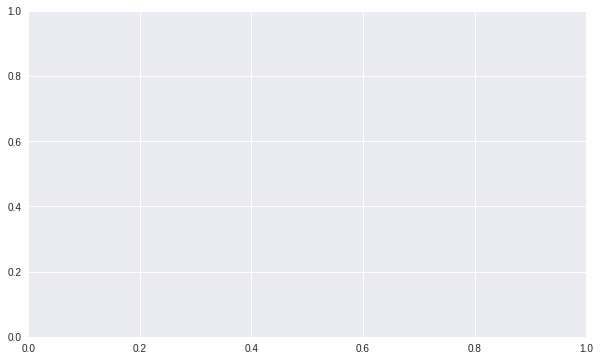

In [192]:
# also try plotting a violin plot at each iteration
# of the difference compared to the first iteration
iters_diffs = defaultdict(list)
# limit = 50
limit = 400
mod = 20
for goterm, taxon in df[['#goterm', 'taxon']].drop_duplicates().values:
    goterm_df = df[df['iter'] < limit][df['#goterm'] == goterm][df['taxon'] == taxon]
#     print("%s, %s, max: %0.3f, min: %0.3f" % (goterm, taxon, goterm_df['fmax'].max(), goterm_df['fmax'].values[0]))
    fmax_diff = goterm_df['fmax'] - goterm_df['fmax'].values[0]
#     print(fmax_diff)
#     break
    for i, diff in enumerate(fmax_diff):
        if (i % mod) == 0:
            iters_diffs[i].append(diff)
    # fill in the rest if it stopped early
    while i+1 < limit:
        i += 1
        iters_diffs[i].append(diff)
new_iters_diffs = {}  # not sure why, but for some reason, some are going greater than 24
for i in iters_diffs:
    if i < limit and (i % mod) == 0:
        print(i, len(iters_diffs[i]))
        new_iters_diffs[i] = iters_diffs[i]
iters_diffs = new_iters_diffs
# now plot it
df_iters_diffs = pd.DataFrame(iters_diffs)

fig, ax = plt.subplots(figsize=(10,6))
# sns.violinplot(data=df_iters_diffs)
sns.boxplot(data=df_iters_diffs, fliersize=1.5)
plt.ylabel('Fmax')
plt.xlabel('# iters')
plt.title("LOSO %s %s, %s" % (version, exp_name, h))
out_file = "%s-fmax-iters-boxplots-%d.pdf" % (out_pref, limit)
print("writing to %s" % (out_file))
plt.savefig(out_file)
# plt.savefig(out_file.replace('.png', '.pdf'))
plt.show()
plt.close()
print("medians: %s" % (', '.join(["%s: %0.3f" % (str(a), df_iters_diffs[a].median()) for a in df_iters_diffs.columns])))

/home/jeffl/.local/lib/python2.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


writing to outputs/viz/ranks/loso-expc-rem-neg-comp-iea/2018_06-seq-sim-e0_1-string/pos-neg-bp-a0_95-ktau-iters-boxplots.pdf


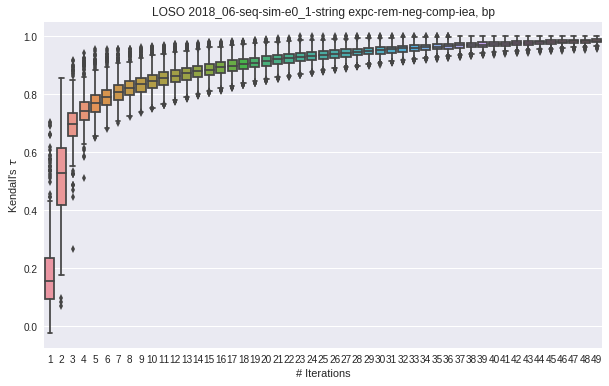

In [204]:
# also try plotting a violin plot at each iteration
# of the kendalls tau
ktau_lists = defaultdict(list)
limit = 50
# limit = 1000
for goterm, taxon in df[['#goterm', 'taxon']].drop_duplicates().values:
    goterm_df = df[df['iter'] < limit][df['#goterm'] == goterm][df['taxon'] == taxon]
    for i, ktau in enumerate(goterm_df['kendalltau']):
#         if (i % 20) == 0:
        ktau_lists[i+1].append(ktau)
    # fill in the rest if it stopped early
    while i+1 < limit:
        i += 1
        ktau_lists[i+1].append(ktau)
new_ktau_lists = {}  # not sure why, but for some reason, some are going greater than 24
for i in ktau_lists:
#     print(i, len(ktau_lists[i]))
    if i < limit:
        new_ktau_lists[i] = ktau_lists[i]
ktau_lists = new_ktau_lists
# now plot it
df_ktau_iters = pd.DataFrame(ktau_lists)

fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=df_ktau_iters)
plt.ylabel(r"Kendall's $\tau$")
plt.xlabel('# Iterations')
plt.title("LOSO %s %s, %s" % (version, exp_name, h))
out_file = "%s-ktau-iters-boxplots.pdf" % (out_pref)
print("writing to %s" % (out_file))
# plt.savefig(out_file)
# plt.savefig(out_file.replace('.png', '.pdf'))
plt.show()
plt.close()

In [ ]:
# first load the all rankings, then the k200
goterms = ['GO:0009405']
k_str = 'all'
for goterm in goterms:
    all_ranks_file = "%s/compare-ranks-%s-k%s.txt" % (out_dir, goterm, k_str)
    df = pd.read_csv(all_ranks_file, sep='\t')
    df_50iter = df[df.index < 25]
    print(df.head())
    # now plot the num_unranked, max_d and the spearmanr
    out_file = "%s/%s-compare-ranks-%s-k%s-kendalltau-20iter.pdf" % (out_dir, version, goterm, k_str)
    plot_series(df_50iter['#kendalltau'], 
                title='SinkSoucePlus-Squeeze comparison of node ranking \n to fixed ranking at each iteration \n Pathogenesis (GO:0009405) - %s k' % (k_str), 
                xlabel='# Iterations', 
                ylabel=r"Kendall's $\tau$",
                out_file=out_file)
#     col = "num_unranked"
#     out_file = "%s/compare-ranks-%s-k%s-%s.pdf" % (out_dir, goterm, k_str, col)
#     plot_series(df[col], 
#             title='SinkSoucePlus-Squeeze number of nodes whose rank is not fixed by UB and LB \n Pathogenesis (GO:0009405) - %s k' % (k_str), 
#             xlabel='# Iterations', 
#             ylabel='# Unranked nodes',
#             out_file=out_file)
#     col = "max_d"
#     out_file = "%s/compare-ranks-%s-k%s-%s.pdf" % (out_dir, goterm, k_str, col)
#     plot_series(df[col], 
#             title='SinkSoucePlus-Squeeze maximum amount of score change at each iteration \n Pathogenesis (GO:0009405) - %s k' % (k_str), 
#             xlabel='# Iterations', 
#             ylabel='Max change in score (epsilon)',
#             out_file=out_file)